In [1]:
# Core
import glob
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Silent Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)

In [2]:
# Finding the files to use
files = glob.glob('../data/df*.csv')
files

['../data\\df_complete.csv',
 '../data\\df_ext.csv',
 '../data\\df_merged_final_vars.csv',
 '../data\\df_mintic_merged.csv',
 '../data\\df_vars_modelamiento.csv',
 '../data\\df_vars_modeling_dpto_final.csv']

In [3]:
# Loading the dataframe
df = pd.read_csv(files[-1])
df.head()

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),porcentaje_del_pib_por_actividades_economicas_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),porcentaje_del_pib_por_actividades_economicas_-_actividades_financieras_y_de_seguros_(actividades_financieras_y_de_seguros),porcentaje_del_pib_por_actividades_economicas_-_actividades_inmobiliarias_(actividades_inmobiliarias),porcentaje_del_pib_por_actividades_economicas_-_actividades_profesionales_(actividades_profesionales;_cientificas_y_tecnicas;_actividades_de_servicios_administrativos_y_de_apoyo),porcentaje_del_pib_por_actividades_economicas_-_administracion_publica_y_defensa_(administracion_publica_y_defensa;_planes_de_seguridad_social_de_afiliacion_obligatoria;_educacion;_actividades_de_atencion_de_la_salud_humana_y_de_servicios_sociales),porcentaje_del_pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),porcentaje_del_pib_por_actividades_economicas_-_comercio_(comercio_al_por_mayor_y_al_por_menor;_reparacion_de_vehiculos_automotores_y_motocicletas;_transporte_y_almacenamiento;_alojamiento_y_servicios_de_comida),porcentaje_del_pib_por_actividades_economicas_-_construccion_(construccion),porcentaje_del_pib_por_actividades_economicas_-_electricidad;_gas;_vapor_y_saneamiento_ambiental_(suministro_de_electricidad;_gas;_vapor_y_aire_acondicionado;_distribucion_de_agua;_evacuacion_y_tratamiento_de_aguas_residuales;_gestion_de_desechos_y_actividades_de_saneamiento_ambiental),porcentaje_del_pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),porcentaje_del_pib_por_actividades_economicas_-_impuestos_(impuestos),porcentaje_del_pib_por_actividades_economicas_-_industrias_manufactureras_(industrias_manufactureras),porcentaje_del_pib_por_actividades_economicas_-_informacion_y_comunicaciones_(informacion_y_comunicaciones),cobertura_bruta_en_educacion_-_total,cobertura_bruta_en_educacion_media,cobertura_bruta_en_educacion_primaria,cobertura_bruta_en_transicion,cobertura_en_educacion_superior,cobertura_neta_en_transicion,puntaje_promedio_pruebas_saber_11_-_lectura_critica,tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),penetracion_de_banda_ancha,tasa_de_violencias_basadas_en_genero,afiliados_al_regimen_subsidado,mortalidad_en_menores_de_5_anios_por_infeccion_respiratoria_aguda_(ira),porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal,porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer,porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_14_a_17_anios,porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_18_a_26_anios,porcentaje_de_nacidos_vivos_hijos_de_mujeres_menores_de_14_anios,tas

In [4]:
print(f'df:\n Number of columns: {len(df.columns)}\n Number of rows: {len(df)}')

df:
 Number of columns: 94
 Number of rows: 132


In [5]:
# Finding the columns with na
nans = df.isna().sum()
nans.loc[nans.gt(0)]

participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio)    33
pib_per_capita                                                                                                                                                                                                                                                                                                                                                                                                                                              33
pib_per_capita_como_porcentaje_del_promedio_nacional                                                      

Some columns don't have data for 2019

In [6]:
# Finding the columns with NAs not on 2019
nans2 = df.loc[~df.anio.eq(2019)].isna().sum()
nans2.loc[nans2.gt(0)]

Series([], dtype: int64)

All the columns from 2016-2018 don't have NAs

In [7]:
# Filtering the data in two datasets, one from 2016 to 2018 and another one from 2016 to 2019 
df_com = df.loc[~df.anio.eq(2019)]
df_ext = df.drop(nans.loc[nans.gt(0)].index, axis = 'columns')

In [8]:
print(f'df_com:\n Number of columns: {len(df_com.columns)}\n Number of rows: {len(df_com)}')
print(f'df_ext:\n Number of columns: {len(df_ext.columns)}\n Number of rows: {len(df_ext)}')

df_com:
 Number of columns: 94
 Number of rows: 99
df_ext:
 Number of columns: 56
 Number of rows: 132


With one of the datasets we are sacrificing observations for features and viceversa

We are going to use the one with more features

In [9]:
df_com.head()

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),porcentaje_del_pib_por_actividades_economicas_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),porcentaje_del_pib_por_actividades_economicas_-_actividades_financieras_y_de_seguros_(actividades_financieras_y_de_seguros),porcentaje_del_pib_por_actividades_economicas_-_actividades_inmobiliarias_(actividades_inmobiliarias),porcentaje_del_pib_por_actividades_economicas_-_actividades_profesionales_(actividades_profesionales;_cientificas_y_tecnicas;_actividades_de_servicios_administrativos_y_de_apoyo),porcentaje_del_pib_por_actividades_economicas_-_administracion_publica_y_defensa_(administracion_publica_y_defensa;_planes_de_seguridad_social_de_afiliacion_obligatoria;_educacion;_actividades_de_atencion_de_la_salud_humana_y_de_servicios_sociales),porcentaje_del_pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),porcentaje_del_pib_por_actividades_economicas_-_comercio_(comercio_al_por_mayor_y_al_por_menor;_reparacion_de_vehiculos_automotores_y_motocicletas;_transporte_y_almacenamiento;_alojamiento_y_servicios_de_comida),porcentaje_del_pib_por_actividades_economicas_-_construccion_(construccion),porcentaje_del_pib_por_actividades_economicas_-_electricidad;_gas;_vapor_y_saneamiento_ambiental_(suministro_de_electricidad;_gas;_vapor_y_aire_acondicionado;_distribucion_de_agua;_evacuacion_y_tratamiento_de_aguas_residuales;_gestion_de_desechos_y_actividades_de_saneamiento_ambiental),porcentaje_del_pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),porcentaje_del_pib_por_actividades_economicas_-_impuestos_(impuestos),porcentaje_del_pib_por_actividades_economicas_-_industrias_manufactureras_(industrias_manufactureras),porcentaje_del_pib_por_actividades_economicas_-_informacion_y_comunicaciones_(informacion_y_comunicaciones),cobertura_bruta_en_educacion_-_total,cobertura_bruta_en_educacion_media,cobertura_bruta_en_educacion_primaria,cobertura_bruta_en_transicion,cobertura_en_educacion_superior,cobertura_neta_en_transicion,puntaje_promedio_pruebas_saber_11_-_lectura_critica,tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),penetracion_de_banda_ancha,tasa_de_violencias_basadas_en_genero,afiliados_al_regimen_subsidado,mortalidad_en_menores_de_5_anios_por_infeccion_respiratoria_aguda_(ira),porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal,porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer,porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_14_a_17_anios,porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_18_a_26_anios,porcentaje_de_nacidos_vivos_hijos_de_mujeres_menores_de_14_anios,tas

In [10]:
# Columns

list(df_com.columns)

['anio',
 'codigo_departamento',
 'codigo_entidad',
 'promedio_del_componente_de_gestion_por_departamento_y_nacion',
 'promedio_del_componente_de_resultados_por_departamento_y_nacion',
 'participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio)',
 'pib_per_capita',
 'pib_per_capita_como_porcentaje_del_promedio_nacional',
 'pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca)',
 'pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras)',
 'porcentaje_del_pib_por_actividades_economicas_-_

Let's remove columns not relevant

In [11]:
to_drop = ['participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio)',
           'pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca)',
           'pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras)',
           'porcentaje_del_pib_por_actividades_economicas_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio)',
           'porcentaje_del_pib_por_actividades_economicas_-_actividades_financieras_y_de_seguros_(actividades_financieras_y_de_seguros)',
           'porcentaje_del_pib_por_actividades_economicas_-_actividades_inmobiliarias_(actividades_inmobiliarias)',
           'porcentaje_del_pib_por_actividades_economicas_-_actividades_profesionales_(actividades_profesionales;_cientificas_y_tecnicas;_actividades_de_servicios_administrativos_y_de_apoyo)',
           'porcentaje_del_pib_por_actividades_economicas_-_administracion_publica_y_defensa_(administracion_publica_y_defensa;_planes_de_seguridad_social_de_afiliacion_obligatoria;_educacion;_actividades_de_atencion_de_la_salud_humana_y_de_servicios_sociales)',
           'porcentaje_del_pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca)',
           'porcentaje_del_pib_por_actividades_economicas_-_comercio_(comercio_al_por_mayor_y_al_por_menor;_reparacion_de_vehiculos_automotores_y_motocicletas;_transporte_y_almacenamiento;_alojamiento_y_servicios_de_comida)',
           'porcentaje_del_pib_por_actividades_economicas_-_construccion_(construccion)',
           'porcentaje_del_pib_por_actividades_economicas_-_electricidad;_gas;_vapor_y_saneamiento_ambiental_(suministro_de_electricidad;_gas;_vapor_y_aire_acondicionado;_distribucion_de_agua;_evacuacion_y_tratamiento_de_aguas_residuales;_gestion_de_desechos_y_actividades_de_saneamiento_ambiental)',
           'porcentaje_del_pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras)',
           'porcentaje_del_pib_por_actividades_economicas_-_impuestos_(impuestos)',
           'porcentaje_del_pib_por_actividades_economicas_-_industrias_manufactureras_(industrias_manufactureras)',
           'porcentaje_del_pib_por_actividades_economicas_-_informacion_y_comunicaciones_(informacion_y_comunicaciones)',
           'cobertura_bruta_en_educacion_media', 'cobertura_bruta_en_educacion_primaria', 'cobertura_bruta_en_transicion',
           'cobertura_neta_en_transicion', 'puntaje_promedio_pruebas_saber_11_-_lectura_critica', 'afiliados_al_regimen_subsidado',
           'mortalidad_en_menores_de_5_anios_por_infeccion_respiratoria_aguda_(ira)', 'porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_14_a_17_anios',
           'porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_18_a_26_anios', 'porcentaje_de_nacidos_vivos_hijos_de_mujeres_menores_de_14_anios',
           'tasa_de_fecundidad_especifica_en_mujeres_de_10_a_14_anios', 'tasa_de_fecundidad_especifica_en_mujeres_de_10_a_19_anios',
           'tasa_de_mortalidad_(x_cada_1.000_habitantes)', 'ingresos_per_capita_por_impuesto_a_la_industria_y_al_comercio',
           'ingresos_per_capita_por_impuesto_predial', 'intereses_de_deuda_publica', 'recursos_del_balance_y_variacion_de_depositos',
           'regalias_per_capita_(valor_efectivamente_girado_al_municipio)', 'transferencias_de_los_ingresos_corrientes',
           'transferencias_per_capita_de_los_ingresos_corrientes', 'porcentaje_de_poblacion_de_hombres_de__20-24',
           'porcentaje_de_poblacion_de_hombres_de__25-29', 'porcentaje_de_poblacion_de_hombres_de__30-34', 'porcentaje_de_poblacion_de_hombres_de__35-39',
           'porcentaje_de_poblacion_de_hombres_de__45-49', 'porcentaje_de_poblacion_de_mujeres_de__25-29',
           'hurtos', 'homicidios', 'violencia_intrafamiliar',]

df2 = df_com.drop(to_drop, axis = 'columns')

<AxesSubplot:>

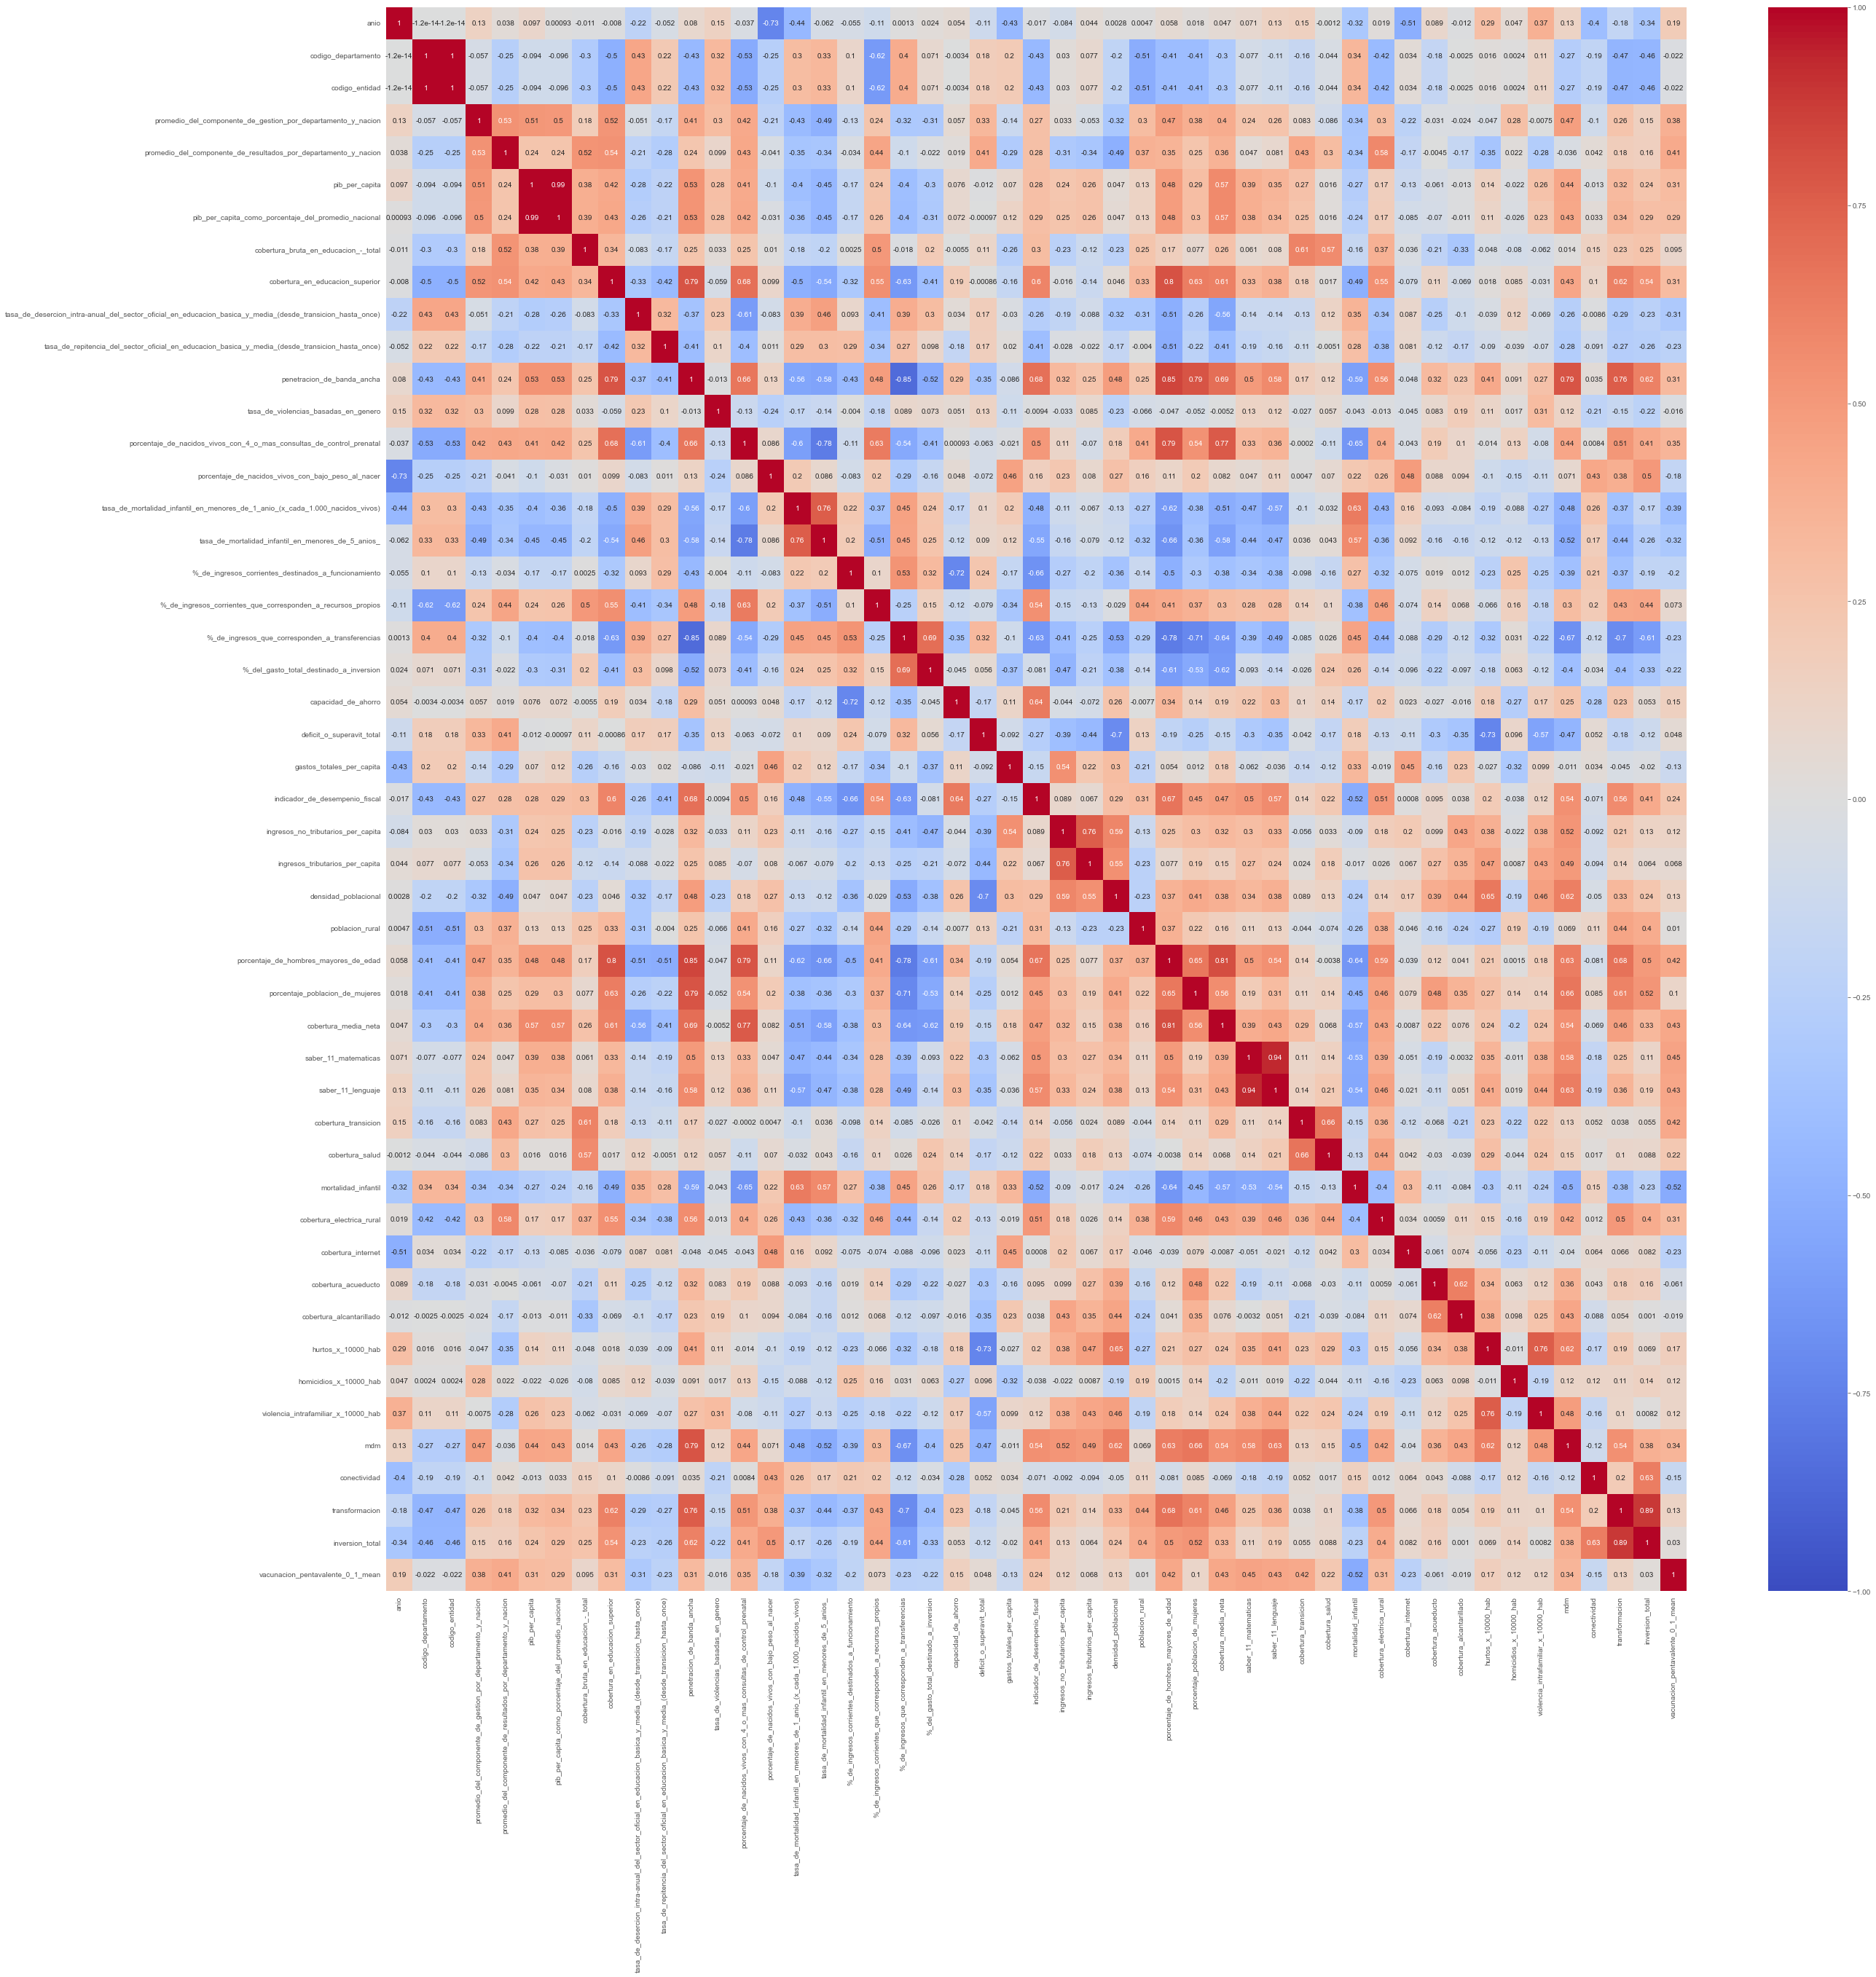

In [12]:
# Mapping the correlations
corr = df2.corr()

# Heatmap of the correlations
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

Let's remove the correlations higher than |0,8|

In [13]:
to_drop = ['pib_per_capita_como_porcentaje_del_promedio_nacional', 'porcentaje_de_hombres_mayores_de_edad', 'penetracion_de_banda_ancha',
           'saber_11_lenguaje']

df2 = df2.drop(to_drop, axis = 'columns')

Let's check the distribution of the features

In [ ]:
len(df2.columns)

In [ ]:
# Histplot
plt.figure(figsize=(20, 70))
for i, feature in enumerate(df2.columns[3:]):
    plt.subplot(14, 3, i+1)
    pl2 = sns.histplot(x = feature, data = df2)
    plt.xlabel(feature)

For OLS we need to add a constant

In [ ]:
# Constant
df2['constant'] = 1

Let's do a first OLS model

In [17]:
# Additional columns to drop
to_drop = ['anio', 'codigo_departamento', 'codigo_entidad', 'promedio_del_componente_de_resultados_por_departamento_y_nacion', 'inversion_total']

# Splitting the data
y = df2.promedio_del_componente_de_resultados_por_departamento_y_nacion
X = df2.drop(to_drop, axis = 'columns')

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .3, random_state = 1337)

In [18]:
model = sm.OLS(y_tr, X_tr).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                  
===========================================================================================================================
Dep. Variable:     promedio_del_componente_de_resultados_por_departamento_y_nacion   R-squared:                       0.998
Model:                                                                         OLS   Adj. R-squared:                  0.996
Method:                                                              Least Squares   F-statistic:                     188.4
Date:                                                             Thu, 02 Sep 2021   Prob (F-statistic):           1.32e-25
Time:                                                                     16:12:17   Log-Likelihood:                 335.49
No. Observations:                                                               69   AIC:                            -589.0
Df Residuals:                                                                   28   BIC:                            -497.4
Df Model:                                                                       40                                         
Covariance Type:                                                               HC3                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
promedio_del_componente_de_gestion_por_departamento_y_nacion                                                   0.1107      0.179      0.619      0.536      -0.240       0.461
pib_per_capita                                                                                               2.65e-11   2.71e-10      0.098      0.922   -5.05e-10    5.58e-10
cobertura_bruta_en_educacion_-_total                                                                          -0.0002      0.000     -0.771      0.441      -0.001       0.000
cobertura_en_educacion_superior                                                                                0.0001      0.000      1.147      0.251   -9.48e-05       0.000
tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)     0.0008      0.001      0.682      0.495      -0.002       0.003
tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)                0.0004      0.001      0.303      0.762      -0.002       0.003
tasa_de_violencias_basadas_en_genero                                                                       -3.112e-06   1.05e-05     -0.297      0.767   -2.37e-05    1.74e-05
porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal                                       7.121e-05      0.000      0.225      0.822      -0.001       0.001
porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer                                                          -6.27e-05      0.001     -0.070      0.944      -0.002       0.002
tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos)                               1.787e-05      0.000      0.056      0.955      -0.001       0.001
tasa_de_mortalidad_infantil_en_menores_de_5_anios_                                                            -0.0001      0.000     -0.384      0.701      -0.001       0.001
%_de_ingresos_corrientes_destinados_a_funcionamiento                                                           0.0001      0.000      0.57

Text(0, 0.5, 'Actual QoL')

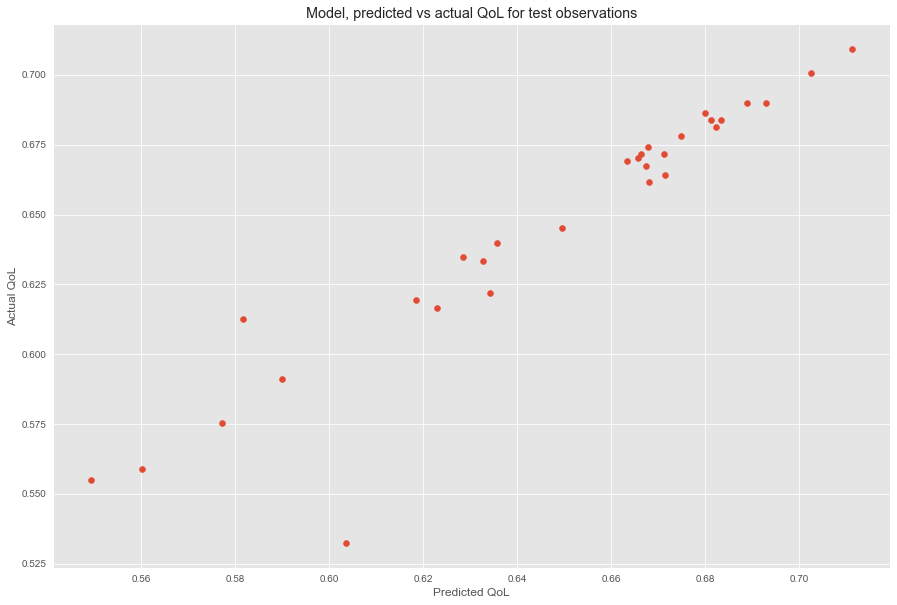

In [19]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(x=model.predict(X_te), y=y_te)
ax.set_title('Model, predicted vs actual QoL for test observations')
ax.set_xlabel('Predicted QoL')
ax.set_ylabel('Actual QoL')

In [20]:
mse = round(mean_squared_error(y_te, model.predict(X_te)), 6)
print(f'MSE: {mse}')

MSE: 0.000221


The condition number is very large and the r2 is too high, so let's try removing non significant variables

In [21]:
# Additional columns to drop
to_drop = ['anio', 'codigo_departamento', 'codigo_entidad', 'promedio_del_componente_de_resultados_por_departamento_y_nacion', 'inversion_total', 
           'gastos_totales_per_capita', 'poblacion_rural', 'tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos)',
           'indicador_de_desempenio_fiscal', 'capacidad_de_ahorro', 'porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer',
           'deficit_o_superavit_total', 'pib_per_capita', 'porcentaje_poblacion_de_mujeres', 'tasa_de_violencias_basadas_en_genero',
           'porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal', 'cobertura_internet', 'ingresos_no_tributarios_per_capita',
           'ingresos_tributarios_per_capita', 'tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)',
           'cobertura_bruta_en_educacion_-_total', 'tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)',
           'tasa_de_mortalidad_infantil_en_menores_de_5_anios_', 'promedio_del_componente_de_gestion_por_departamento_y_nacion', 'mdm']

# Splitting the data
y = df2.promedio_del_componente_de_resultados_por_departamento_y_nacion
X = df2.drop(to_drop, axis = 'columns')

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .3, random_state = 1337)

In [22]:
model = sm.OLS(y_tr, X_tr).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                  
===========================================================================================================================
Dep. Variable:     promedio_del_componente_de_resultados_por_departamento_y_nacion   R-squared:                       0.997
Model:                                                                         OLS   Adj. R-squared:                  0.996
Method:                                                              Least Squares   F-statistic:                     772.6
Date:                                                             Thu, 02 Sep 2021   Prob (F-statistic):           7.71e-53
Time:                                                                     16:12:17   Log-Likelihood:                 315.97
No. Observations:                                                               69   AIC:                            -589.9
Df Residuals:                                                                   48   BIC:                            -543.0
Df Model:                                                                       20                                         
Covariance Type:                                                               HC3                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
cobertura_en_educacion_superior                                  0.0002   5.44e-05      3.110      0.002    6.25e-05       0.000
%_de_ingresos_corrientes_destinados_a_funcionamiento             0.0001   6.38e-05      2.321      0.020     2.3e-05       0.000
%_de_ingresos_corrientes_que_corresponden_a_recursos_propios    -0.0002   5.55e-05     -3.693      0.000      -0.000   -9.62e-05
%_de_ingresos_que_corresponden_a_transferencias                 -0.0003      8e-05     -3.809      0.000      -0.000      -0.000
%_del_gasto_total_destinado_a_inversion                          0.0008      0.000      3.953      0.000       0.000       0.001
densidad_poblacional                                         -3.053e-05   1.43e-06    -21.397      0.000   -3.33e-05   -2.77e-05
cobertura_media_neta                                             0.0887      0.009      9.547      0.000       0.070       0.107
saber_11_matematicas                                             0.0006      0.000      2.124      0.034    4.95e-05       0.001
cobertura_transicion                                             0.0932      0.010      9.677      0.000       0.074       0.112
cobertura_salud                                                  0.0710      0.012      5.785      0.000       0.047       0.095
mortalidad_infantil                                             -0.0009      0.000     -5.884      0.000      -0.001      -0.001
cobertura_electrica_rural                                        0.0935      0.005     18.417      0.000       0.084       0.103
cobertura_acueducto                                              0.0616      0.008      8.207      0.000       0.047       0.076
cobertura_alcantarillado                                         0.0340      0.006      5.748      0.000       0.022       0.046
hurtos_x_10000_hab                                              -0.0004   5.21e-05     -8.467      0.000      -0.001      -0.000
homicidios_x_10000_hab                                          -0.0015      0.000     -3.203      0.001      -0.002      -0.001
violencia_intrafamiliar_x_10000_hab                             -0.0016      0.000    -11.914      0.000      -0.002      -0.001
conectiv

Text(0, 0.5, 'Actual QoL')

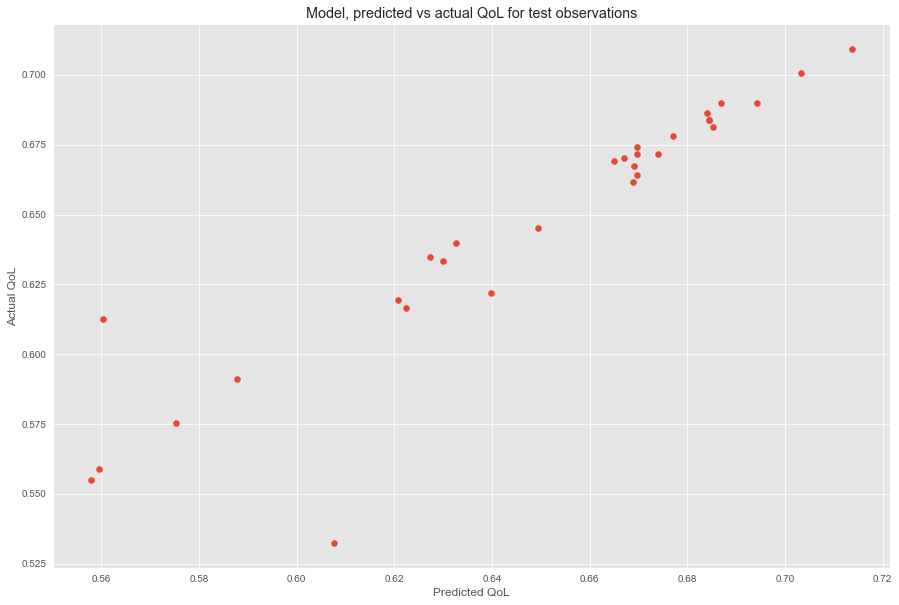

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(x=model.predict(X_te), y=y_te)
ax.set_title('Model, predicted vs actual QoL for test observations')
ax.set_xlabel('Predicted QoL')
ax.set_ylabel('Actual QoL')

In [24]:
mse = round(mean_squared_error(y_te, model.predict(X_te)), 6)
print(f'MSE: {mse}')

MSE: 0.000304


Let's try normalizing the variables

In [25]:
# Variables without normal distribution
results = []

for column in df2.columns[3:]:
    # Jarque bera test of normality
    jarque = scipy.stats.jarque_bera(df2[column]).pvalue
    if jarque > 0.05:
        # We don't reject the null hypothesis of normality
        pass
    else:
        # We reject the null hypothesis of normality
        results.append(column)

results

['promedio_del_componente_de_resultados_por_departamento_y_nacion',
 'pib_per_capita',
 'tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)',
 'tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)',
 'tasa_de_violencias_basadas_en_genero',
 'porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal',
 'tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos)',
 'tasa_de_mortalidad_infantil_en_menores_de_5_anios_',
 '%_de_ingresos_corrientes_destinados_a_funcionamiento',
 '%_de_ingresos_corrientes_que_corresponden_a_recursos_propios',
 '%_de_ingresos_que_corresponden_a_transferencias',
 '%_del_gasto_total_destinado_a_inversion',
 'capacidad_de_ahorro',
 'deficit_o_superavit_total',
 'gastos_totales_per_capita',
 'indicador_de_desempenio_fiscal',
 'ingresos_no_tributarios_per_capita',
 'ingresos_tributarios_per_capita',
 'densidad_poblacional',
 'poblacion_r

In [26]:
# Variables to ignore
results.pop(results.index('constant'))

'constant'

In [27]:
df_normal = df2.copy()
df_normal = df_normal[results]
normalization = (df_normal - df_normal.mean()) / df_normal.std()
normalization.head()

,promedio_del_componente_de_resultados_por_departamento_y_nacion,pib_per_capita,tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once),tasa_de_violencias_basadas_en_genero,porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal,tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos),tasa_de_mortalidad_infantil_en_menores_de_5_anios_,%_de_ingresos_corrientes_destinados_a_funcionamiento,%_de_ingresos_corrientes_que_corresponden_a_recursos_propios,%_de_ingresos_que_corresponden_a_transferencias,%_del_gasto_total_destinado_a_inversion,capacidad_de_ahorro,deficit_o_superavit_total,gastos_totales_per_capita,indicador_de_desempenio_fiscal,ingresos_no_tributarios_per_capita,ingresos_tributarios_per_capita,densidad_poblacional,poblacion_rural,cobertura_transicion,cobertura_salud,mortalidad_infantil,cobertura_electrica_rural,cobertura_internet,hurtos_x_10000_hab,homicidios_x_10000_hab,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,0.880411,0.683467,0.350421,0.240982,-0.361838,0.671577,-0.220901,-0.618968,-0.919077,0.701495,-1.638452,-2.033409,0.120681,0.138037,0.071168,0.738034,0.513575,0.041377,-0.205330,3.273039,0.303138,0.377825,-0.402024,0.719707,-0.453388,-0.380101,1.328926,-0.531433,0.747794,2.453398,2.626535,3.237947,0.559237
1,1.018908,0.152532,-1.028057,-0.787295,-1.377111,0.704920,-0.007121,-0.217557,-0.814714,0.090479,-1.370966,-0.228168,1.282914,0.083428,-0.034674,1.213692,-0.431921,-0.250700,0.495445,-0.740173,0.543429,0.180761,-0.173618,0.359693,-0.206050,-0.566761,-1.007508,-0.827642,-0.585154,0.248068,0.985672,0.897355,1.328324
2,-2.632573,-0.116007,-1.057511,0.648845,-0.322777,0.567378,-0.508594,-0.644714,-1.291305,0.565559,-2.398895,-1.318972,0.960103,-0.179951,0.412235,1.621177,2.729648,2.929267,5.193173,-1.017012,0.449921,1.302281,-1.137857,0.983039,0.728327,1.199775,-0.563178,-0.542448,4.049518,-0.220863,2.068907,1.533205,1.018452
3,-0.095662,0.022975,-0.533218,-0.253051,-1.151955,0.439957,0.567128,-0.285434,-0.091130,0.746498,-0.355465,-0.364188,-0.825781,0.144173,0.005081,0.167865,-0.455927,-0.664031,-0.228668,0.385983,-0.023441,0.069767,0.331103,-0.159762,1.251988,-0.907306,-0.785490,-1.012835,-1.256477,1.534525,0.889129,1.428691,-1.637453
4,0.530871,0.576413,-0.833656,-0.241562,0.129412,0.612630,-0.073075,-0.583859,0.054979,0.732116,-0.659050,-1.165784,-2.654482,0.129587,0.421468,-0.563440,0.294096,-0.021682,-0.258115,0.615277,0.496718,-0.524266,-0.386328,0.605309,0.314458,-0.455702,-1.011108,0.555273,0.187498,1.256253,-0.519442,0.182341,-0.103099


In [28]:
df3 = df2.copy()
for column in results:
    df3[column] = normalization[column]

In [29]:
# Additional columns to drop
to_drop = ['anio', 'codigo_departamento', 'codigo_entidad', 'promedio_del_componente_de_resultados_por_departamento_y_nacion', 'inversion_total']

# Splitting the data
y = df3.promedio_del_componente_de_resultados_por_departamento_y_nacion
X = df3.drop(to_drop, axis = 'columns')

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .3, random_state = 1337)

In [30]:
model = sm.OLS(y_tr, X_tr).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                  
===========================================================================================================================
Dep. Variable:     promedio_del_componente_de_resultados_por_departamento_y_nacion   R-squared:                       0.998
Model:                                                                         OLS   Adj. R-squared:                  0.996
Method:                                                              Least Squares   F-statistic:                     401.7
Date:                                                             Thu, 02 Sep 2021   Prob (F-statistic):           1.85e-30
Time:                                                                     16:12:17   Log-Likelihood:                 122.26
No. Observations:                                                               69   AIC:                            -162.5
Df Residuals:                                                                   28   BIC:                            -70.92
Df Model:                                                                       40                                         
Covariance Type:                                                               HC3                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
promedio_del_componente_de_gestion_por_departamento_y_nacion                                                   2.4327      3.934      0.618      0.536      -5.279      10.144
pib_per_capita                                                                                                 0.0042      0.043      0.098      0.922      -0.079       0.088
cobertura_bruta_en_educacion_-_total                                                                          -0.0034      0.004     -0.771      0.441      -0.012       0.005
cobertura_en_educacion_superior                                                                                0.0029      0.003      1.147      0.251      -0.002       0.008
tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)     0.0310      0.045      0.682      0.495      -0.058       0.120
tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)                0.0145      0.048      0.303      0.762      -0.079       0.108
tasa_de_violencias_basadas_en_genero                                                                          -0.0124      0.042     -0.297      0.767      -0.094       0.069
porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal                                          0.0263      0.117      0.225      0.822      -0.202       0.255
porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer                                                            -0.0014      0.020     -0.070      0.944      -0.040       0.037
tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos)                                  0.0035      0.062      0.056      0.955      -0.118       0.124
tasa_de_mortalidad_infantil_en_menores_de_5_anios_                                                            -0.0272      0.071     -0.384      0.701      -0.166       0.112
%_de_ingresos_corrientes_destinados_a_funcionamiento                                                           0.0358      0.062      0.57

Text(0, 0.5, 'Actual QoL')

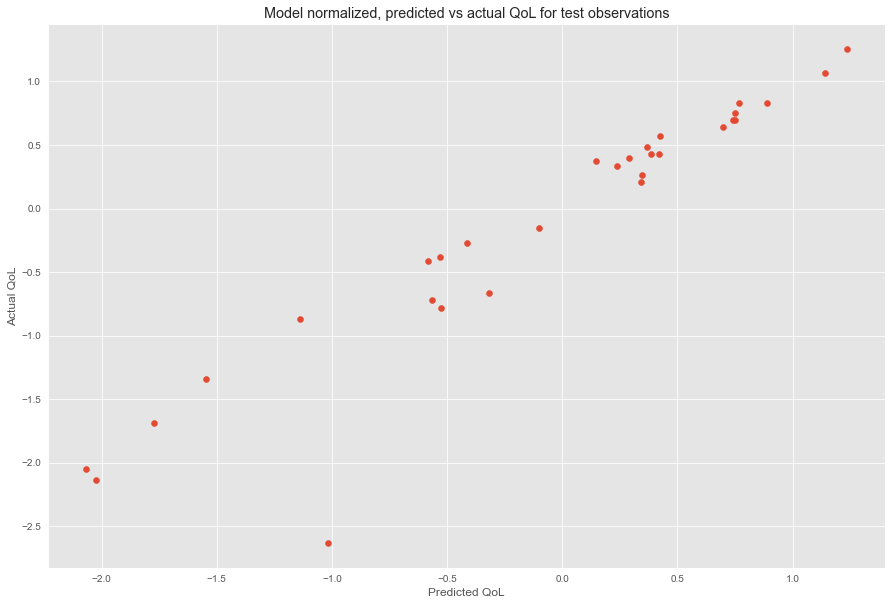

In [40]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(x=model.predict(X_te), y=y_te)
ax.set_title('Model normalized, predicted vs actual QoL for test observations')
ax.set_xlabel('Predicted QoL')
ax.set_ylabel('Actual QoL')

In [32]:
mse = round(mean_squared_error(y_te, model.predict(X_te)), 6)
print(f'MSE: {mse}')

MSE: 0.10694


The condition number got reduced significantly, but is't still very high, so we are going to reduce the number of features

In [33]:
# Additional columns to drop
to_drop = ['anio', 'codigo_departamento', 'codigo_entidad', 'inversion_total', 
           'poblacion_rural', 'gastos_totales_per_capita', 'tasa_de_mortalidad_infantil_en_menores_de_1_anio_(x_cada_1.000_nacidos_vivos)',
           'porcentaje_de_nacidos_vivos_con_bajo_peso_al_nacer', 'pib_per_capita', 'cobertura_internet', 'deficit_o_superavit_total',
           '%_de_ingresos_corrientes_destinados_a_funcionamiento', 'tasa_de_repitencia_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)',
           'porcentaje_poblacion_de_mujeres', 'tasa_de_violencias_basadas_en_genero', '%_de_ingresos_corrientes_que_corresponden_a_recursos_propios',
           'porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal', 'homicidios_x_10000_hab', 'cobertura_en_educacion_superior',
           'capacidad_de_ahorro', 'ingresos_no_tributarios_per_capita', 'ingresos_tributarios_per_capita', 'tasa_de_mortalidad_infantil_en_menores_de_5_anios_',
           'cobertura_bruta_en_educacion_-_total', 'cobertura_alcantarillado', 'saber_11_matematicas', 'indicador_de_desempenio_fiscal',
           ]

df_model = df3.drop(to_drop, axis = 'columns')

In [33]:
# Splitting the data
y = df_model.promedio_del_componente_de_resultados_por_departamento_y_nacion
X = df_model.drop('promedio_del_componente_de_resultados_por_departamento_y_nacion', axis = 'columns')

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .3, random_state = 1337)

In [34]:
model = sm.OLS(y_tr, X_tr).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                  
===========================================================================================================================
Dep. Variable:     promedio_del_componente_de_resultados_por_departamento_y_nacion   R-squared:                       0.992
Model:                                                                         OLS   Adj. R-squared:                  0.989
Method:                                                              Least Squares   F-statistic:                     373.6
Date:                                                             Thu, 02 Sep 2021   Prob (F-statistic):           2.26e-47
Time:                                                                     16:12:17   Log-Likelihood:                 70.069
No. Observations:                                                               69   AIC:                            -104.1
Df Residuals:                                                                   51   BIC:                            -63.92
Df Model:                                                                       17                                         
Covariance Type:                                                               HC3                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
promedio_del_componente_de_gestion_por_departamento_y_nacion                                                   1.4284      1.355      1.054      0.292      -1.228       4.085
tasa_de_desercion_intra-anual_del_sector_oficial_en_educacion_basica_y_media_(desde_transicion_hasta_once)     0.0684      0.021      3.202      0.001       0.027       0.110
%_de_ingresos_que_corresponden_a_transferencias                                                               -0.0579      0.028     -2.037      0.042      -0.114      -0.002
%_del_gasto_total_destinado_a_inversion                                                                        0.0725      0.025      2.855      0.004       0.023       0.122
densidad_poblacional                                                                                          -0.4249      0.082     -5.171      0.000      -0.586      -0.264
cobertura_media_neta                                                                                           1.9945      0.313      6.378      0.000       1.382       2.607
cobertura_transicion                                                                                           0.2299      0.029      8.020      0.000       0.174       0.286
cobertura_salud                                                                                                0.0799      0.033      2.446      0.014       0.016       0.144
mortalidad_infantil                                                                                           -0.1434      0.035     -4.151      0.000      -0.211      -0.076
cobertura_electrica_rural                                                                                      0.4558      0.035     13.149      0.000       0.388       0.524
cobertura_acueducto                                                                                            1.9711      0.129     15.336      0.000       1.719       2.223
hurtos_x_10000_hab                                                                                            -0.2381      0.035     -6.75

Text(0, 0.5, 'Actual QoL')

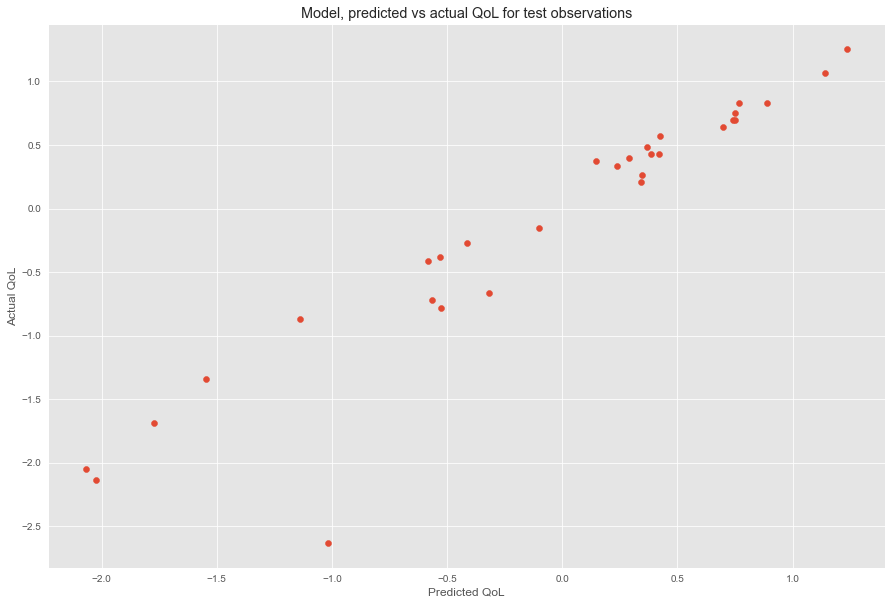

In [35]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(x=model.predict(X_te), y=y_te)
ax.set_title('Model, predicted vs actual QoL for test observations')
ax.set_xlabel('Predicted QoL')
ax.set_ylabel('Actual QoL')

In [36]:
mse = round(mean_squared_error(y_te, model.predict(X_te)), 6)
print(f'MSE: {mse}')

MSE: 0.105938


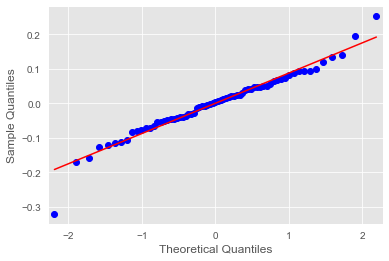

In [37]:
sm.qqplot(model.resid, line="s");

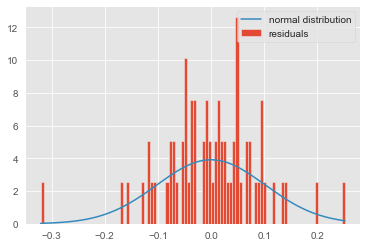

In [38]:
plt.hist(model.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(model.resid.min(), model.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model.scale)),
    label="normal distribution")
outliers = np.abs(model.resid)>4*np.sqrt(model.scale)
sns.rugplot(model.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

<AxesSubplot:xlabel='cat', ylabel='residuals'>

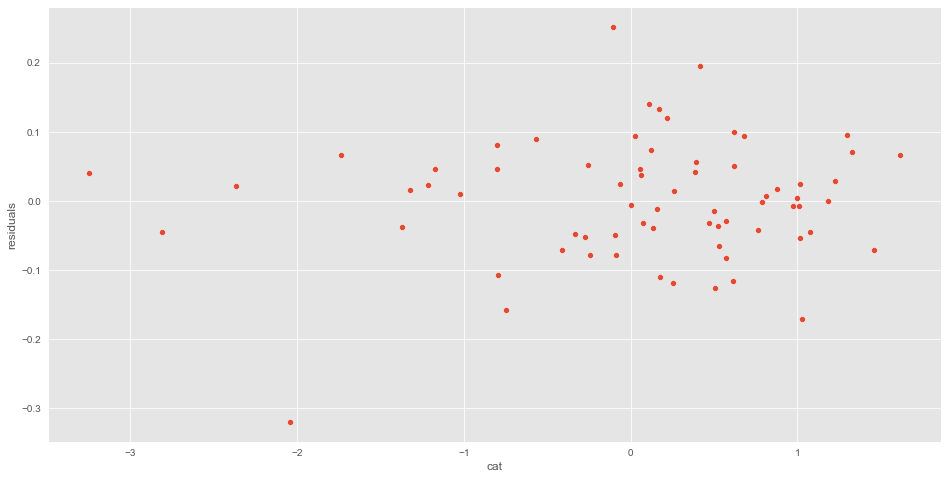

In [39]:
df4 = X_tr.copy()


df4['cat'] = y_tr
df4['residuals'] = model.resid.values

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (16,8))

sns.scatterplot(x = 'cat', y = 'residuals', data = df4, ax = ax)